In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
file_path = r"C:\Users\Bhargavi\Desktop\Python\city_data.csv"
data = pd.read_csv(file_path)

In [4]:
# Display data info
print("Data Info:")
print(data.info())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [5]:
print("\nData Description:")
print(data.describe())


Data Description:
              PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.96288

In [6]:
# Task 1: Correlation Matrix and Heatmap
# Exclude non-numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.846498  0.433491  0.350709  0.436792  0.275086  0.089912   
PM10     0.846498  1.000000  0.502349  0.464380  0.527768  0.376816  0.112588   
NO       0.433491  0.502349  1.000000  0.478070  0.794890  0.185621  0.212607   
NO2      0.350709  0.464380  0.478070  1.000000  0.627627  0.234938  0.356521   
NOx      0.436792  0.527768  0.794890  0.627627  1.000000  0.166224  0.226992   
NH3      0.275086  0.376816  0.185621  0.234938  0.166224  1.000000  0.104891   
CO       0.089912  0.112588  0.212607  0.356521  0.226992  0.104891  1.000000   
SO2      0.132325  0.256974  0.170322  0.392233  0.238397 -0.038998  0.489697   
O3       0.161238  0.244919  0.014580  0.293349  0.093170  0.094972  0.041736   
Benzene  0.023911  0.022265  0.035771  0.025260  0.039121 -0.015650  0.061861   
Toluene  0.117080  0.169335  0.150857  0.273926  0.189386  0.013227  0.277904   
Xylene 

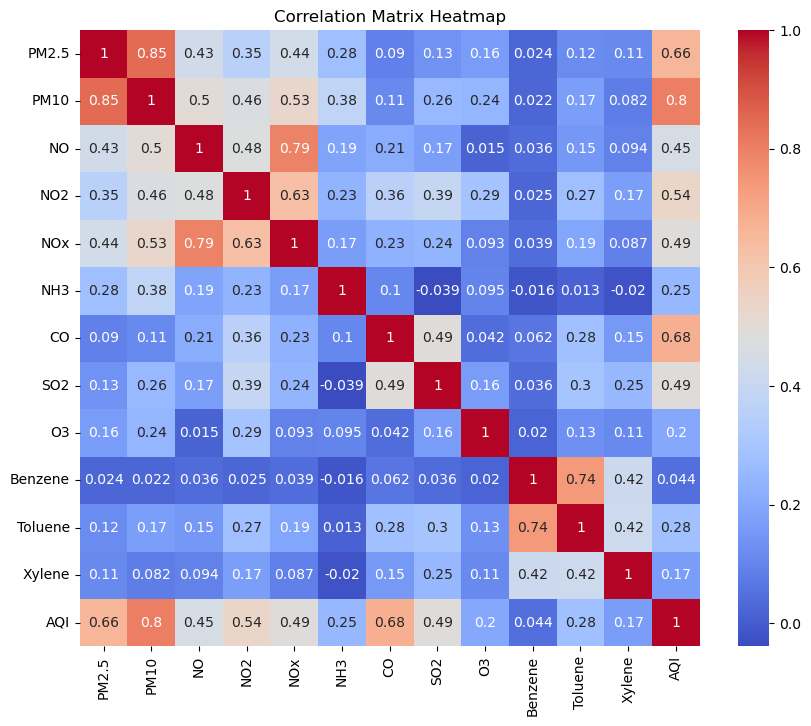

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
# Task 2: Handling Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [9]:
# Fill missing values in numeric columns with the mean
numeric_cols = data.select_dtypes(include=[float, int])
data[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

In [10]:
# Optionally, fill missing values in non-numeric columns if necessary
non_numeric_cols = data.select_dtypes(exclude=[float, int])
data[non_numeric_cols.columns] = non_numeric_cols.fillna('Unknown')

In [11]:
# Display a sample of the data after replacing missing values
print("\nData after handling missing values (sample rows):")
print(data.head())  # Shows the first 5 rows of the dataset

# Check again for missing values to confirm replacements
print("\nMissing Values After Replacement:")
print(data.isnull().sum())



Data after handling missing values (sample rows):
        City        Date      PM2.5        PM10     NO    NO2    NOx  \
0  Ahmedabad  01-01-2015  67.450578  118.127103   0.92  18.22  17.15   
1  Ahmedabad  02-01-2015  67.450578  118.127103   0.97  15.69  16.46   
2  Ahmedabad  03-01-2015  67.450578  118.127103  17.40  19.30  29.70   
3  Ahmedabad  04-01-2015  67.450578  118.127103   1.70  18.48  17.97   
4  Ahmedabad  05-01-2015  67.450578  118.127103  22.10  21.42  37.76   

         NH3     CO    SO2      O3  Benzene  Toluene  Xylene         AQI  \
0  23.483476   0.92  27.64  133.36     0.00     0.02    0.00  166.463581   
1  23.483476   0.97  24.55   34.06     3.68     5.50    3.77  166.463581   
2  23.483476  17.40  29.07   30.70     6.80    16.40    2.25  166.463581   
3  23.483476   1.70  18.59   36.08     4.43    10.14    1.00  166.463581   
4  23.483476  22.10  39.33   39.31     7.01    18.89    2.78  166.463581   

  AQI_Bucket  
0    Unknown  
1    Unknown  
2    Unknown  

In [12]:
# Task 3: Feature Engineering
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [18]:
# Task 4: Linear Regression
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
target = 'AQI'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print the predicted AQI values
print("Predicted AQI values:")
print(y_pred)

# Create a DataFrame to compare actual vs predicted AQI
comparison_df = pd.DataFrame({'Actual AQI': y_test, 'Predicted AQI': y_pred})

# Print the comparison
print(comparison_df.head())  # Print first few rows to check


Predicted AQI values:
[143.40963188 143.40963188 134.10184579 ... 125.34189815  88.56116019
 142.30478205]
       Actual AQI  Predicted AQI
22593  166.463581     143.409632
22459  166.463581     143.409632
24213  137.000000     134.101846
25301  190.000000     179.007198
20886  339.000000     292.782984


In [19]:
# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")



Model Coefficients:
PM2.5: 0.960427491950132
PM10: 0.28366536804948117
NO: -0.06581428586037648
NO2: 0.3842583146757694
NOx: 0.15660807191605752
NH3: -0.049161169140015094
CO: 10.217575584800617
SO2: 0.6444879927282217
O3: 0.19124908780280117
Benzene: -0.19862185539432653
Toluene: 0.12630319004847437
Xylene: -0.252688923626755


In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 2943.382240683025
R2 Score: 0.804757775353174


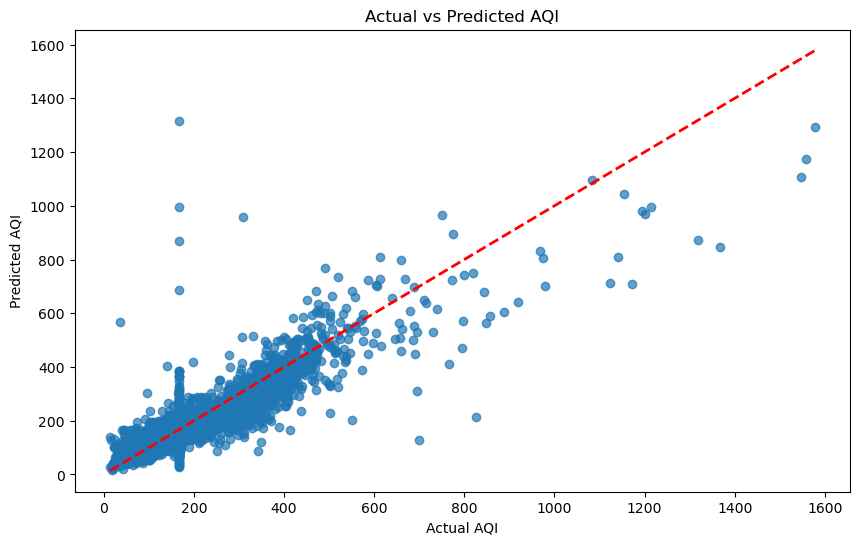

In [15]:
# Task 5: Visualization of Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

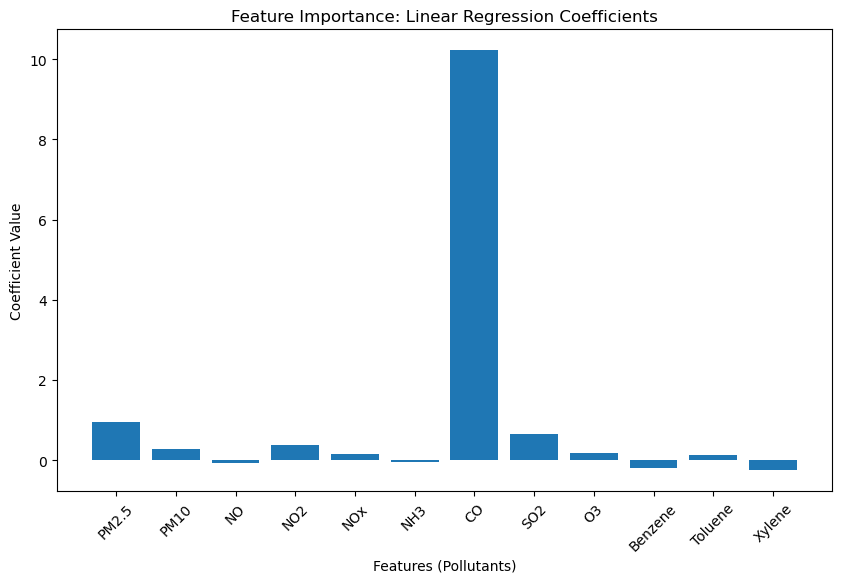

In [16]:
# Plot the model coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, model.coef_)
plt.xlabel('Features (Pollutants)')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance: Linear Regression Coefficients')
plt.xticks(rotation=45)
plt.show()